In [346]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy import stats

# the splitting routines
import splitting as s

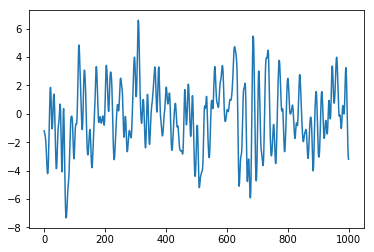

In [218]:
bias = 0
amplitude = 1
length = 1000
gauss1 = np.random.normal(bias,amplitude,length)
gauss2 = np.random.normal(bias,amplitude,length)

width = 3
smooth = signal.gaussian(length,width)

noise1 = np.convolve(gauss1, smooth,'same')
noise2 = np.convolve(gauss2, smooth,'same')
# plt.plot(gauss1)
plt.plot(noise1)
# plt.plot(smooth)

In [45]:
# calculate energy on noise1
E = np.sum(noise1**2)

# or using parsevals theorem
G1 = np.fft.fft(gauss1)
S1 = np.fft.fft(smooth)
S1 = np.pad(S1,(0,G1.size - S1.size),'constant')
# check convolution is the same as multiplication in Fourier domain
checkconv = np.real(np.fft.ifft(G1*S1))


G1.size
S1.size
# print(E)

1000

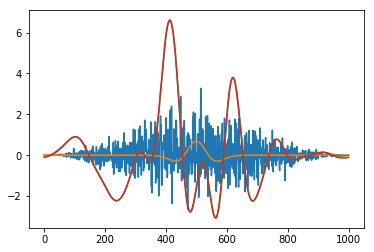

In [70]:
# check that convolution is the same as multiplication in the Fourier domain

a = np.random.normal(0,1,1000) * np.hanning(1000)
b = signal.ricker(1000,40)*5 * np.hanning(1000)
c = np.convolve(a,b,'same')
plt.plot(a)
plt.plot(b)
plt.plot(c)
A = np.fft.fft(a)
B = np.fft.fft(b)
C = np.roll(np.fft.ifft(A*B),500)
plt.plot(np.real(C))

# result:
# it is but you need to "roll" the answer by half the trace 
# length and use a taper to remove edge artefacts

In [192]:
# check Parseval's theorem holds numerically 
nsamps=1000
a = np.random.normal(0,1,nsamps) * signal.tukey(nsamps,0.05)
# b = signal.ricker(nsamps,40)*5 * signal.tukey(nsamps,.5)
# a = np.random.normal(0,1,nsamps) 
# b = signal.ricker(nsamps,40)*5 
# c = np.convolve(a,b,'same')
e = np.sum(a**2)

A = np.fft.fft(a)
# B = np.fft.fft(b)
C = np.absolute(A)
# multiply first and last samps by 0.5 before sum
# Ccoeff = np.ones(A.size)
E = np.sum(C**2)/C.size

print('time domain',e)
print('fourier domain',E)
print('difference',np.abs(e-E))
print('percent', (np.abs(e-E)/e)*100)

# conclusion yes it holds pretty well but don't 
# need to multiply first and last samps by 0.5
# as suggested in Walsh paper and do need to divide by number of samples
# to equalise results

# note the similarity in the form i prefer to the wiki


time domain 992.422485462
fourier domain 992.422485462
difference 2.27373675443e-13
percent 2.29109757965e-14


Parsevals theorem when applied to discrete Fourier Transform looks like this.

$\sum _{n=0}^{N-1}|x[n]|^{2}={\frac {1}{N}}\sum _{k=0}^{N-1}|X[k]|^{2}$

Source: https://en.wikipedia.org/wiki/Parseval%27s_theorem

(array([    4.,    32.,   198.,   891.,  2192.,  3069.,  2375.,   971.,
          235.,    33.]),
 array([-4.35233076, -3.56842243, -2.7845141 , -2.00060576, -1.21669743,
        -0.4327891 ,  0.35111924,  1.13502757,  1.91893591,  2.70284424,
         3.48675257]),
 <a list of 10 Patch objects>)

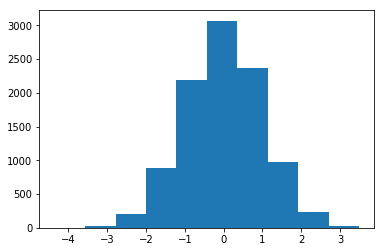

In [94]:
# histogram of noise -- is it gaussian? (should be it's synthetic!)
plt.hist(np.random.normal(0,1,10000))

In [239]:
def ndf(y,taper=True,detrend=True):
    """
    Uses the improvement found by Walsh et al (2013).
    By default will detrend data to ensure zero mean
    and will taper edges using a Tukey filter affecting amplitudes of 5% of data at edges
    """

    if taper is True:
        y = y * signal.tukey(y.size,0.05)
        
    if detrend is True:
        # ensure no trend on the noise trace
        y = signal.detrend(y)

  
    Y = np.fft.fft(y)
    amp = np.absolute(Y)
    
    # estimate E2 and E4 following Walsh et al (2013)
    a = np.ones(Y.size)
    a[0] = a[-1] = 0.5
    E2 = np.sum( a * amp**2)
    E4 = (np.sum( (4 * a**2 / 3) * amp**4))
    
    ndf = 2 * ( 2 * E2**2 / E4 - 1 )
    
    return ndf
    

In [241]:
# ndf(gauss1,taper=True,detrend=False)
y = np.interp(np.arange(gauss1.size*2),2*np.arange(gauss1.size),gauss1)
# print(ndf(gauss1,taper=True,detrend=True))
# print(ndf(gauss1,taper=True))
# print(ndf(gauss1,detrend=True))
print(ndf(noise1))
print(ndf(noise1,taper=True))

210.302869877
208.129297141


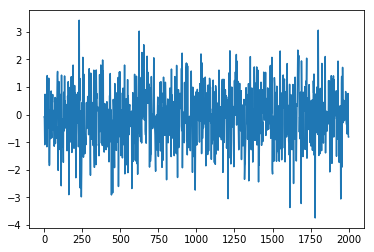

In [172]:
plt.plot(y)

In [209]:

E2 = (np.sum(C**2))
E4 = (np.sum(4/3*C**4))
e2 = E2/1000
e4 = E4/1000

def v(E2,E4):
    return 2 * ((2*E2**2/E4)-1)

print(v(E2,E4))
print(v(e2,e4))


1444.53992361
-0.553460076394


In [222]:
nsamps=1000
width=3
f = signal.gaussian(nsamps,width)
g = np.random.normal(0,1,nsamps)
n = np.convolve(f,g,'same')
F = np.fft.fft(f)
G = np.fft.fft(g)
N = np.fft.fft(n)

In [223]:
E = np.sum(F**2 * G**2) / nsamps

In [225]:
E
np.sum(n**2)

5215.8062994046295

In [253]:
d = s.Pair()
d.split(-30,8)

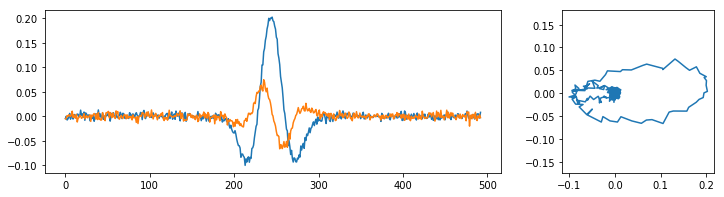

In [254]:
d.plot()

In [255]:
np.cov(d,rowvar=True)

TypeError: unsupported operand type(s) for /: 'Pair' and 'int'

In [259]:
vals,vecs = np.linalg.eig(np.cov(d.data))

In [261]:
vecs

array([[ 0.99680388, -0.0798876 ],
       [ 0.0798876 ,  0.99680388]])

In [263]:
M = d.grideigval()


In [272]:
np.unravel_index(M.lam1.argmin(),M.lam2.shape)

(6, 65)

In [359]:
def plot_surf(lags,degs,vals,cmap='viridis'):
    plt.contourf(lags,degs,vals,cmap=cmap)
    plt.show()

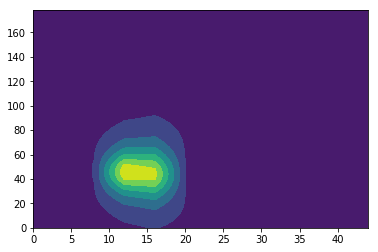

In [411]:
d = s.Pair()
d.split(45,14)
M = d.grideigval()
plot_surf(M.lags,M.degs,M.lam1/M.lam2,cmap='viridis')

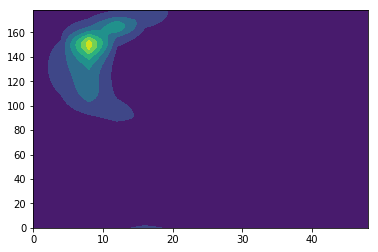

In [317]:
plot_surf(M.lags,M.degs,M.lam1/M.lam2)


In [292]:
(M.lam1/M.lam2)[2,:]

array([  11.33466827,    9.72341113,    8.39648998,    7.29457301,
          6.37236392,    5.59497794,    4.9353178 ,    4.3721636 ,
          3.88877393,    3.47185563,    3.11080229,    2.79713236,
          2.52408033,    2.28631219,    2.07975307,    1.90153224,
          1.75007009,    1.62534035,    1.52927223,    1.46591783,
          1.44030682,    1.45525774,    1.50885273,    1.59608203,
          1.71227594,    1.85475396,    2.02283286,    2.21739764,
          2.44056187,    2.69549642,    2.98639287,    3.31852468,
          3.69838542,    4.1338957 ,    4.63467925,    5.21241369,
          5.8812636 ,    6.65840308,    7.56462966,    8.62505778,
          9.86985337,   11.3349207 ,   13.06236502,   15.10041203,
         17.50224824,   20.32295358,   23.61337965,   27.40966116,
         31.7174366 ,   36.49145544,   41.61469597,   46.88605348,
         52.02926682,   56.73260782,   60.71520548,   63.79725411,
         65.9431477 ,   67.25946939,   67.9548994 ,   68.28608

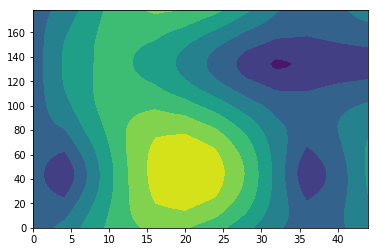

In [343]:
plot_surf(M.lags,M.degs,R(M,30),cmap='viridis_r')

In [432]:
def Ftest(M,ndf,alpha=0.05):
    """
    returns lambda2 value at 100(1-alpha)% confidence interval
    by default alpha=0.05 yielding the value of lambda2 at 95% confidence interval
    """
    lam2min = M.lam2.min()
    k = 2
    R = ((M.lam2 - lam2min)/k) /  (lam2min/(ndf-k))
    F = stats.f.ppf(1-alpha,k,ndf)
    lam2alpha = lam2min * ( 1 + (k/(ndf-k)) * F)
    return lam2alpha

    

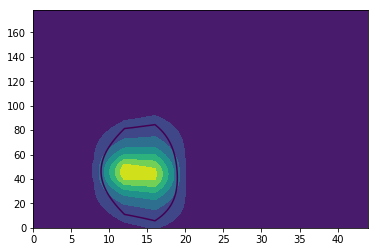

In [434]:
plt.contourf(M.lags,M.degs,M.lam1/M.lam2,cmap='viridis')
plt.contour(M.lags,M.degs,M.lam2,levels=[Ftest(M,5,alpha=0.05)])
plt.show()

In [431]:
Ftest2(M,4,alpha=0.05)

-402.50484950032808

In [417]:
(M.lam1/M.lam2).max()

67.713061514439588

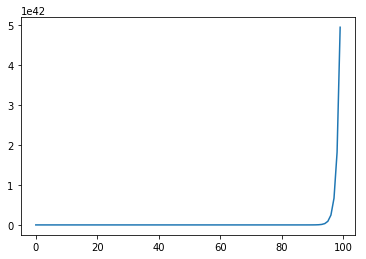

In [440]:

plt.plot(np.cosh(np.arange(100)))